In [1]:
!pip install tensorflow==2.1.0

In [2]:
import pandas as pd
import numpy as np
import os
from geopy.geocoders import Nominatim
from contextlib import suppress
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.optimizers import Adam

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
rice_df=pd.read_csv('/content/drive/MyDrive/BEProjectProcessing/rice/rice_final.csv').drop(['Unnamed: 0'],axis=1)
rice_df

,Commodity,Min Price,Max Price,Modal Price,Latitude,Longitude,Date,Month,Year
0,Rice,2000.0,2500.0,2300.0,24.758640,92.881665,31,12,15
1,Rice,3000.0,3600.0,3200.0,24.758640,92.881665,31,12,15
2,Rice,2400.0,2900.0,2700.0,24.758640,92.881665,31,12,15
3,Rice,2400.0,2900.0,2700.0,24.758640,92.881665,30,12,15
4,Rice,3000.0,3600.0,3200.0,24.758640,92.881665,30,12,15
...,...,...,...,...,...,...,...,...,...
554450,Rice,2700.0,2800.0,2750.0,22.472223,88.093845,7,1,18
554451,Rice,2800.0,2900.0,2850.0,22.472223,88.093845,5,1,18
554452,Rice,2800.0,2900.0,2850.0,22.472223,88.093845,4,1,18
554453,Rice,2700.0,2800.0,2750.0,22.472223,88.093845,2,1,18


In [ ]:
#testing performance of all variations of geom

In [ ]:
path='/content/drive/MyDrive/BEProjectProcessing/Atharvas_models/rice models/rect80'
folders=['loss_mse','loss_mae']
learning_rate=[0.01,0.001,0.0001]
batch_sizes=[0,128]

In [13]:
X=rice_df[['Latitude','Longitude','Date','Month','Year']].values
Y=rice_df[['Min Price','Max Price','Modal Price']].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=26)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(554455, 5)
(526732, 5)
(27723, 5)


In [ ]:
for folder in folders:
    for batch_size in batch_sizes:
        for lr in learning_rate:
            
            model=tf.keras.models.load_model(os.path.join(path,folder+'/'+str(batch_size)+'_'+str(lr)))
            #log_data=pd.read_csv(os.path.join(path,folder+'/'+str(batch_size)+'_'+str(lr)+'training.log'))
            
            Y_pred=model.predict(X_test)
            percent_acc=np.zeros((len(X_test),3))
            
            for i in range(len(X_test)):
                for j in range(3):
                    percent_acc[i][j]=abs(Y_test[i][j]-Y_pred[i][j])*100/Y_test[i][j]   
                    
            print(sum(percent_acc)/len(X_test),batch_size,lr,folder)

[19.8598189  20.21819082 19.15297604] 0 0.01 loss_mse
[16.33155729 16.97128058 16.13503397] 0 0.001 loss_mse
[18.60147571 19.95806521 18.47264556] 0 0.0001 loss_mse
[17.33334712 18.41007127 17.00243863] 128 0.01 loss_mse
[17.27824613 17.90514551 16.9073957 ] 128 0.001 loss_mse
[20.11887574 22.80736793 20.71572355] 128 0.0001 loss_mse
[16.8190781  16.90803501 16.11270304] 0 0.01 loss_mae
[13.53427923 14.50589497 13.57297031] 0 0.001 loss_mae
[16.27431951 17.85059532 16.41679053] 0 0.0001 loss_mae
[14.95618067 15.9632859  14.95334987] 128 0.01 loss_mae
[14.44999756 15.4692177  14.57637263] 128 0.001 loss_mae
[17.16504014 19.02538787 17.61281585] 128 0.0001 loss_mae


In [16]:
X=rice_df[['Latitude','Longitude','Date','Month','Year']].values
Y=rice_df[['Min Price','Max Price','Modal Price']].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=26)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

MAE :  424.1936 , val_MAE :  426.73062000000004 
Batch size :  0 , Learning Rate :  0.01 
Loss Function :  loss_mse , rect80


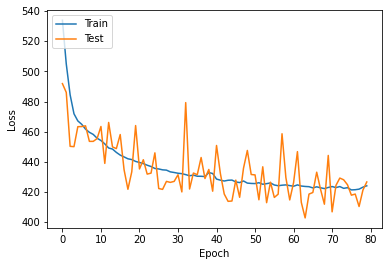

MAE :  363.00388 , val_MAE :  364.20657 
Batch size :  0 , Learning Rate :  0.001 
Loss Function :  loss_mse , rect80


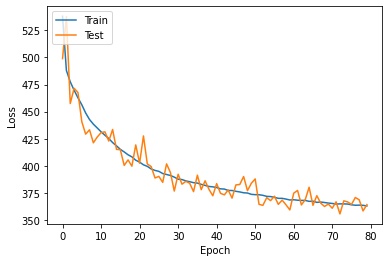

MAE :  425.23837000000003 , val_MAE :  419.9697 
Batch size :  0 , Learning Rate :  0.0001 
Loss Function :  loss_mse , rect80


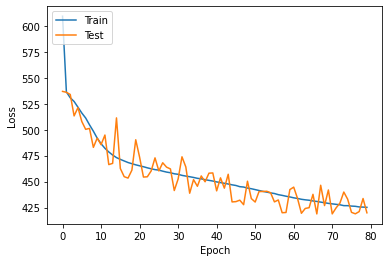

MAE :  403.30136 , val_MAE :  396.18393 
Batch size :  128 , Learning Rate :  0.01 
Loss Function :  loss_mse , rect80


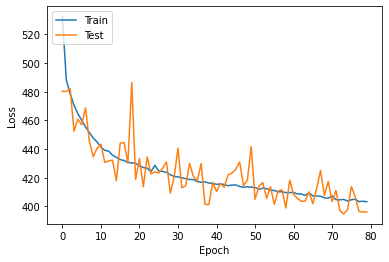

MAE :  377.53643999999997 , val_MAE :  384.29556 
Batch size :  128 , Learning Rate :  0.001 
Loss Function :  loss_mse , rect80


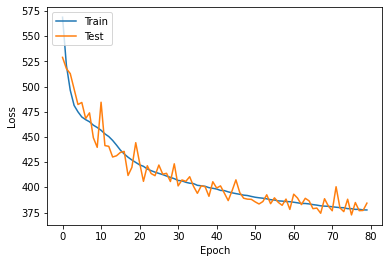

MAE :  451.99172999999996 , val_MAE :  459.26822000000004 
Batch size :  128 , Learning Rate :  0.0001 
Loss Function :  loss_mse , rect80


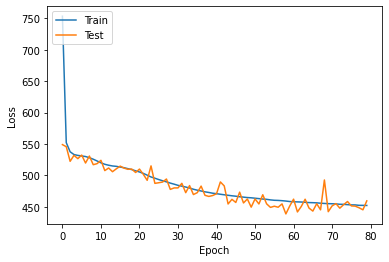

MAE :  390.48694548770516 , val_MAE :  386.04967479817947 
Batch size :  0 , Learning Rate :  0.01 
Loss Function :  loss_mae , rect80


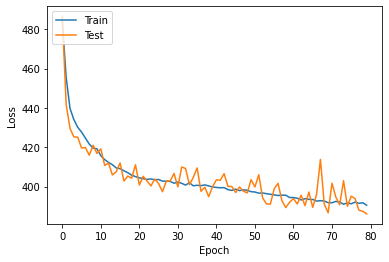

MAE :  331.34307138800136 , val_MAE :  335.09589253477094 
Batch size :  0 , Learning Rate :  0.001 
Loss Function :  loss_mae , rect80


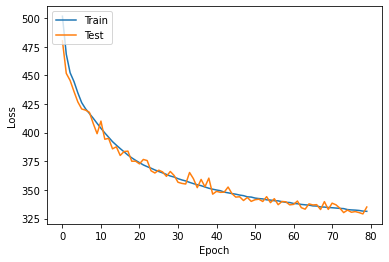

MAE :  403.4908007092962 , val_MAE :  403.71061907164426 
Batch size :  0 , Learning Rate :  0.0001 
Loss Function :  loss_mae , rect80


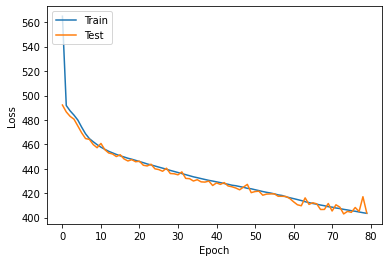

MAE :  357.97284357390413 , val_MAE :  355.6648179815087 
Batch size :  128 , Learning Rate :  0.01 
Loss Function :  loss_mae , rect80


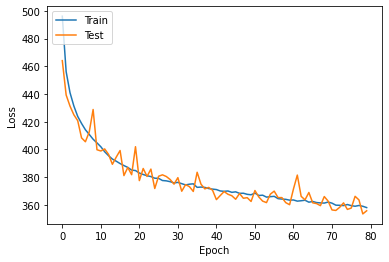

MAE :  348.9639579650295 , val_MAE :  350.53351689255334 
Batch size :  128 , Learning Rate :  0.001 
Loss Function :  loss_mae , rect80


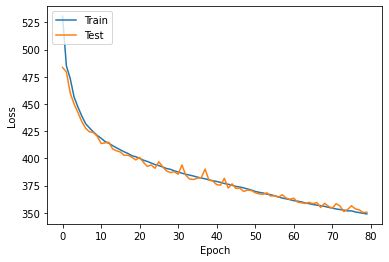

MAE :  423.20906941161047 , val_MAE :  423.1688702057714 
Batch size :  128 , Learning Rate :  0.0001 
Loss Function :  loss_mae , rect80


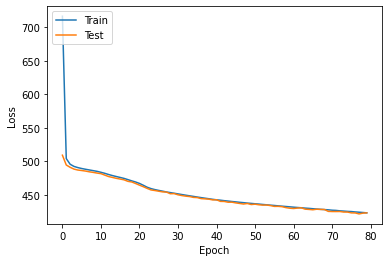

In [ ]:
for folder in folders:
    for batch_size in batch_sizes:
        for lr in learning_rate:
            log_data=pd.read_csv(os.path.join(path,folder+'/'+str(batch_size)+'_'+str(lr)+'training.log'))
            
            if folder=='loss_mse':
                print('MAE : ',log_data['mae'][79],', val_MAE : ',log_data['val_mae'][79],'\nBatch size : ',batch_size,', Learning Rate : ',lr,'\nLoss Function : ' ,folder,', rect80')
                
                plt.plot(log_data['mae'])
                plt.plot(log_data['val_mae'])
                plt.ylabel('Loss')
                plt.xlabel('Epoch')
                plt.legend(['Train','Test'],loc='upper left')
                plt.show()
                
            if folder=='loss_mae':
                print('MAE : ',log_data['loss'][79],', val_MAE : ',log_data['val_loss'][79],'\nBatch size : ',batch_size,', Learning Rate : ',lr,'\nLoss Function : ' ,folder,', rect80')
            
                plt.plot(log_data['loss'])
                plt.plot(log_data['val_loss'])
                plt.ylabel('Loss')
                plt.xlabel('Epoch')
                plt.legend(['Train','Test'],loc='upper left')
                plt.show()

In [4]:
bajra_df=pd.read_csv('/content/drive/MyDrive/BEProjectProcessing/bajra/bajra_final.csv').drop(['Unnamed: 0'],axis=1)
path='/content/drive/MyDrive/BEProjectProcessing/Atharvas_models/bajra models/'
archs=['rect60','rect80']
folders=['loss_mse','loss_mae']
learning_rate=[0.01,0.001,0.0001]
batch_sizes=[0,128]
bajra_df

,Commodity,Min Price,Max Price,Modal Price,Latitude,Longitude,Date,Month,Year
0,Bajra(Pearl Millet/Cumbu),1885.0,1945.0,1915.0,28.613178,76.998285,16,12,19
1,Bajra(Pearl Millet/Cumbu),1825.0,1995.0,1910.0,28.613178,76.998285,15,12,19
2,Bajra(Pearl Millet/Cumbu),1950.0,1950.0,1950.0,28.613178,76.998285,14,12,19
3,Bajra(Pearl Millet/Cumbu),1841.0,1850.0,1845.0,28.613178,76.998285,12,12,19
4,Bajra(Pearl Millet/Cumbu),1870.0,2040.0,1955.0,28.613178,76.998285,10,12,19
...,...,...,...,...,...,...,...,...,...
242052,Bajra(Pearl Millet/Cumbu),1900.0,2000.0,1950.0,28.785205,77.586326,18,12,18
242053,Bajra(Pearl Millet/Cumbu),1900.0,2000.0,1950.0,28.785205,77.586326,17,12,18
242054,Bajra(Pearl Millet/Cumbu),750.0,850.0,750.0,28.785205,77.586326,29,11,11
242055,Bajra(Pearl Millet/Cumbu),800.0,850.0,800.0,28.785205,77.586326,26,11,11


In [6]:
X=bajra_df[['Latitude','Longitude','Date','Month','Year']].values
Y=bajra_df[['Min Price','Max Price','Modal Price']].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=26)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [9]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(242057, 5)
(229954, 5)
(12103, 5)


In [7]:
for arch in archs:
    for folder in folders:
        for batch_size in batch_sizes:
            for lr in learning_rate:

                model=tf.keras.models.load_model(os.path.join(path,arch+'/'+folder+'/'+str(batch_size)+'_'+str(lr)))
                #log_data=pd.read_csv(os.path.join(path,folder+'/'+str(batch_size)+'_'+str(lr)+'training.log'))

                Y_pred=model.predict(X_test)
                percent_acc=np.zeros((len(X_test),3))

                for i in range(len(X_test)):
                    for j in range(3):
                        percent_acc[i][j]=abs(Y_test[i][j]-Y_pred[i][j])*100/Y_test[i][j]   

                print(sum(percent_acc)/len(X_test),batch_size,lr,folder,arch)

[7.5215507  7.53827131 6.93523278] 0 0.01 loss_mse rect60
[7.822595   8.227782   7.54394563] 0 0.001 loss_mse rect60
[8.07312077 7.93348122 7.44831985] 0 0.0001 loss_mse rect60
[7.6671351  7.70190947 7.05712763] 128 0.01 loss_mse rect60
[7.23737303 7.20545916 6.60804857] 128 0.001 loss_mse rect60
[9.10457168 9.26832482 8.45123982] 128 0.0001 loss_mse rect60
[6.92880607 6.84043727 6.20456298] 0 0.01 loss_mae rect60
[6.04338134 5.95726343 5.45740204] 0 0.001 loss_mae rect60
[7.42990599 7.44780434 6.90653818] 0 0.0001 loss_mae rect60
[6.15217573 6.16734308 5.59559138] 128 0.01 loss_mae rect60
[6.37871947 6.42723709 5.85645128] 128 0.001 loss_mae rect60
[7.58326935 7.57783235 7.02153708] 128 0.0001 loss_mae rect60
[8.471405   8.92202506 8.0348116 ] 0 0.01 loss_mse rect80
[7.75316183 7.56912687 7.11192342] 0 0.001 loss_mse rect80
[9.25823632 9.02256851 8.59183597] 0 0.0001 loss_mse rect80
[7.02412145 6.95697162 6.38872933] 128 0.01 loss_mse rect80
[8.0246685  7.96962974 7.46210129] 128 0.00

MAE :  83.09605 , val_MAE :  80.37151999999999 
Batch size :  0 , Learning Rate :  0.01 
Loss Function :  loss_mse   rect60


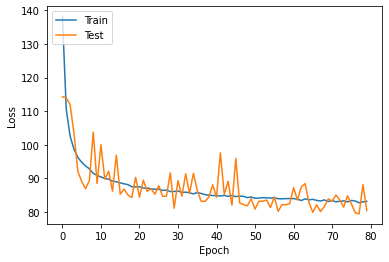

MAE :  74.23838 , val_MAE :  86.00801 
Batch size :  0 , Learning Rate :  0.001 
Loss Function :  loss_mse   rect60


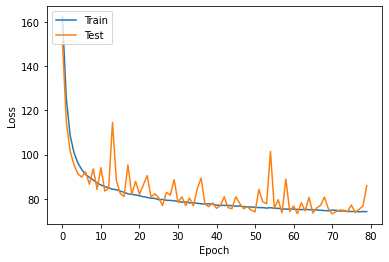

MAE :  83.49608 , val_MAE :  85.37205 
Batch size :  0 , Learning Rate :  0.0001 
Loss Function :  loss_mse   rect60


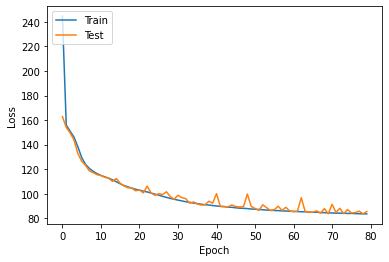

MAE :  79.32552 , val_MAE :  82.20688 
Batch size :  128 , Learning Rate :  0.01 
Loss Function :  loss_mse   rect60


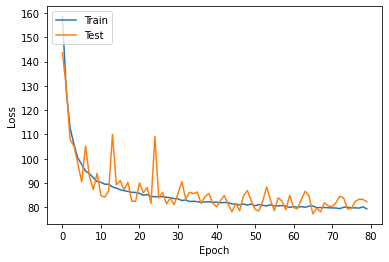

MAE :  78.07729 , val_MAE :  77.9101 
Batch size :  128 , Learning Rate :  0.001 
Loss Function :  loss_mse   rect60


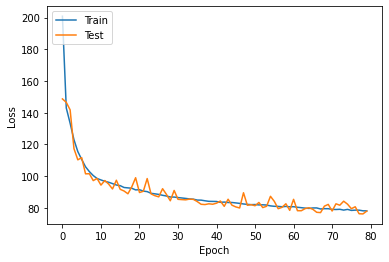

MAE :  92.55715 , val_MAE :  95.17923 
Batch size :  128 , Learning Rate :  0.0001 
Loss Function :  loss_mse   rect60


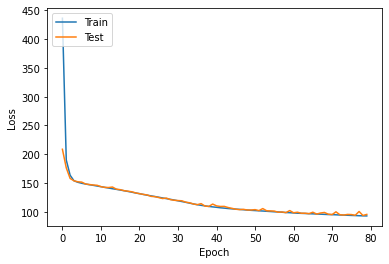

MAE :  75.41051731846002 , val_MAE :  76.07921155235998 
Batch size :  0 , Learning Rate :  0.01 
Loss Function :  loss_mae   rect60


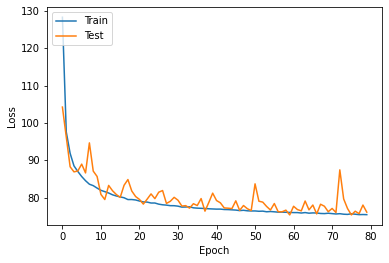

MAE :  64.71834639038457 , val_MAE :  66.11552110230895 
Batch size :  0 , Learning Rate :  0.001 
Loss Function :  loss_mae   rect60


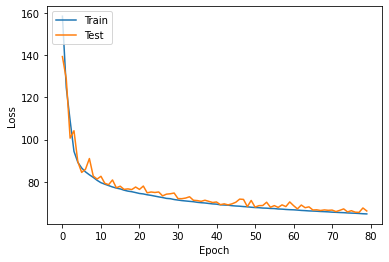

MAE :  79.19657185367207 , val_MAE :  81.19715079955499 
Batch size :  0 , Learning Rate :  0.0001 
Loss Function :  loss_mae   rect60


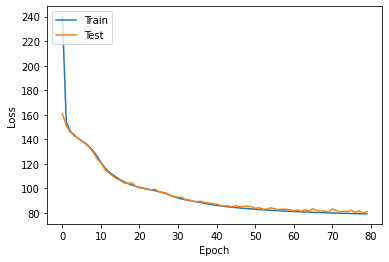

MAE :  67.43865292960034 , val_MAE :  68.90572178152034 
Batch size :  128 , Learning Rate :  0.01 
Loss Function :  loss_mae   rect60


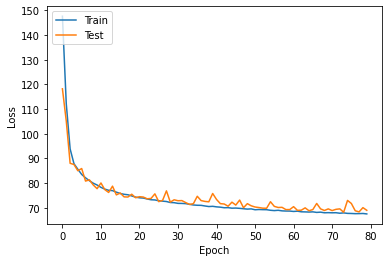

MAE :  71.69380586129911 , val_MAE :  71.76774624589159 
Batch size :  128 , Learning Rate :  0.001 
Loss Function :  loss_mae   rect60


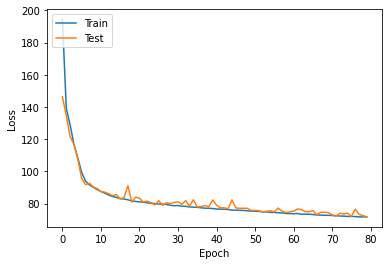

MAE :  83.02478463938584 , val_MAE :  83.6632862237626 
Batch size :  128 , Learning Rate :  0.0001 
Loss Function :  loss_mae   rect60


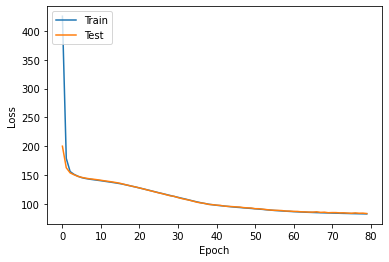

MAE :  78.88241 , val_MAE :  88.65106999999999 
Batch size :  0 , Learning Rate :  0.01 
Loss Function :  loss_mse   rect80


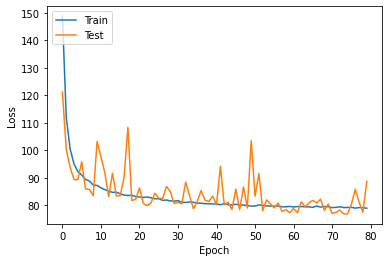

MAE :  77.5004 , val_MAE :  80.605736 
Batch size :  0 , Learning Rate :  0.001 
Loss Function :  loss_mse   rect80


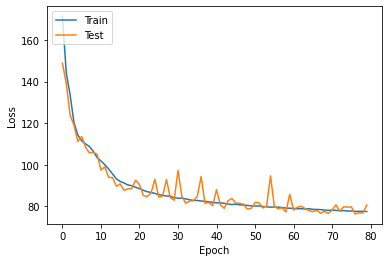

MAE :  100.77707 , val_MAE :  100.34936 
Batch size :  0 , Learning Rate :  0.0001 
Loss Function :  loss_mse   rect80


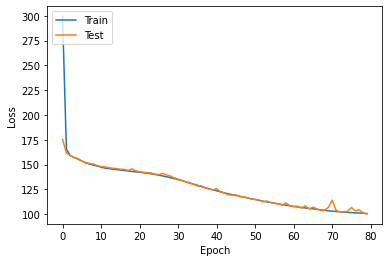

MAE :  77.37873 , val_MAE :  75.699905 
Batch size :  128 , Learning Rate :  0.01 
Loss Function :  loss_mse   rect80


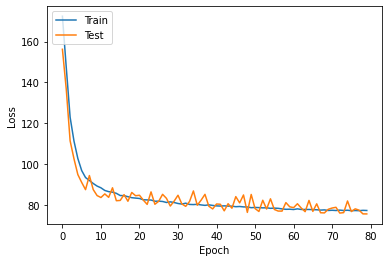

MAE :  88.70411999999999 , val_MAE :  86.03099 
Batch size :  128 , Learning Rate :  0.001 
Loss Function :  loss_mse   rect80


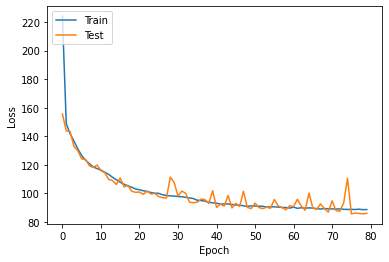

MAE :  112.83425 , val_MAE :  116.08871 
Batch size :  128 , Learning Rate :  0.0001 
Loss Function :  loss_mse   rect80


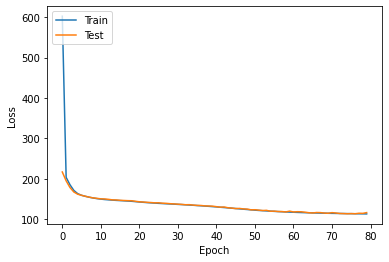

MAE :  71.72363284017037 , val_MAE :  72.89728263578247 
Batch size :  0 , Learning Rate :  0.01 
Loss Function :  loss_mae   rect80


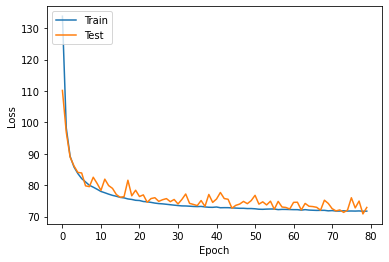

MAE :  72.32561951239657 , val_MAE :  73.91654574310623 
Batch size :  0 , Learning Rate :  0.001 
Loss Function :  loss_mae   rect80


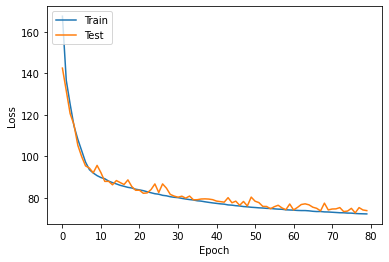

MAE :  94.99826783647109 , val_MAE :  95.86448791914907 
Batch size :  0 , Learning Rate :  0.0001 
Loss Function :  loss_mae   rect80


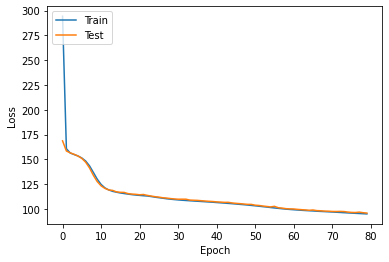

MAE :  67.4176017121693 , val_MAE :  68.58792705736032 
Batch size :  128 , Learning Rate :  0.01 
Loss Function :  loss_mae   rect80


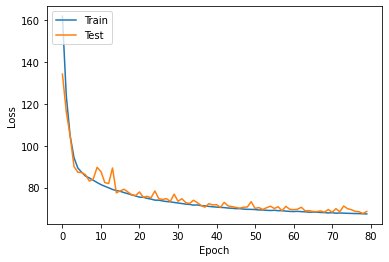

MAE :  80.09792388390744 , val_MAE :  82.88409679822269 
Batch size :  128 , Learning Rate :  0.001 
Loss Function :  loss_mae   rect80


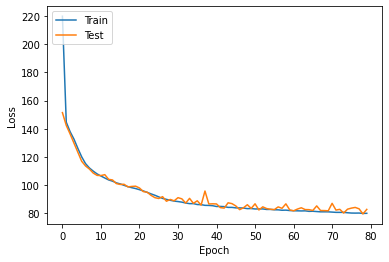

MAE :  106.09108977908916 , val_MAE :  106.17691001019024 
Batch size :  128 , Learning Rate :  0.0001 
Loss Function :  loss_mae   rect80


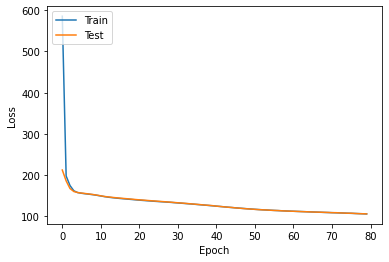

In [8]:
for arch in archs:    
    for folder in folders:
        for batch_size in batch_sizes:
            for lr in learning_rate:
                log_data=pd.read_csv(os.path.join(path,arch+'/'+folder+'/'+str(batch_size)+'_'+str(lr)+'training.log'))

                if folder=='loss_mse':
                    print('MAE : ',log_data['mae'][79],', val_MAE : ',log_data['val_mae'][79],'\nBatch size : ',batch_size,', Learning Rate : ',lr,'\nLoss Function : ' ,folder,' ',arch)

                    plt.plot(log_data['mae'])
                    plt.plot(log_data['val_mae'])
                    plt.ylabel('Loss')
                    plt.xlabel('Epoch')
                    plt.legend(['Train','Test'],loc='upper left')
                    plt.show()

                if folder=='loss_mae':
                    print('MAE : ',log_data['loss'][79],', val_MAE : ',log_data['val_loss'][79],'\nBatch size : ',batch_size,', Learning Rate : ',lr,'\nLoss Function : ' ,folder,' ',arch)

                    plt.plot(log_data['loss'])
                    plt.plot(log_data['val_loss'])
                    plt.ylabel('Loss')
                    plt.xlabel('Epoch')
                    plt.legend(['Train','Test'],loc='upper left')
                    plt.show()